In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
data = pd.read_csv("Entrenamieto_ECI_2020.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null object
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-null int6

In [4]:
import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [5]:
df = data[(data.Stage=="Closed Won") | (data.Stage == "Closed Lost")]

In [6]:
len(df)

16883

In [7]:
df.Last_Activity.describe()

count     16883
unique        1
top         NaT
freq      16883
Name: Last_Activity, dtype: object

In [8]:
df = df.drop(["ID","Last_Activity", "ASP_converted_Currency", "Prod_Category_A","Actual_Delivery_Date"], axis = 1)

In [9]:
df.Stage = df.Stage.replace({"Closed Won": 1, "Closed Lost": 0})

In [10]:
pd.options.display.max_columns = df.shape[1]
df.describe(include = ['O'])

,Region,Territory,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Total_Amount_Currency,Total_Taxable_Amount_Currency
count,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883,16883
unique,5,75,7,800,14,79,1620,9791,5267,48,53,7,25,2,9,1096,26,7,7,28,53,3,996,649,53,225,446,5,968,1001,45,4,5,5
top,Japan,None,Bureaucratic_Code_4,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_9795,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,6/30/2017,None,None,None,None,None,None,NaT,2/8/2018,Person_Name_47,Product_Family_77,Product_Name_100,USD,3/31/2016,3/31/2016,2018 - 10,Q2,USD,USD
freq,4869,4981,12544,3009,9454,4856,2122,36,6909,3722,3773,8786,6774,16713,7682,124,15847,15871,15903,15864,15918,15988,4594,5820,8514,1345,976,7321,381,451,666,4423,7321,7305


In [11]:
df[df["Opportunity_ID"] == 123]

,Region,Territory,PricingDelivery_Terms_Quote_Appr,PricingDelivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_converted,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
248,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_7414,123,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,1/6/2016,None,None,None,None,None,None,NaT,12/4/2016,Person_Name_47,Product_Family_4,Product_Name_4,JPY,NaN,NaN,3/31/2016,3/31/2016,2016 - 3,Q1,2016,0,JPY,4400.0,JPY,6085640.0,0
249,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_7414,123,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,1/6/2016,None,None,None,None,None,None,NaT,12/4/2016,Person_Name_47,Product_Family_226,Product_Name_491,JPY,NaN,NaN,3/31/2016,3/31/2016,2016 - 3,Q1,2016,0,JPY,6200.0,JPY,6085640.0,0
250,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_7414,123,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,1/6/2016,None,None,None,None,None,None,NaT,12/4/2016,Person_Name_47,Product_Family_27,Product_Name_27,JPY,NaN,NaN,3/31/2016,3/31/2016,2016 - 3,Q1,2016,0,JPY,1200000.0,JPY,6085640.0,0
251,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_7414,123,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,1/6/2016,None,None,None,None,None,None,NaT,12/4/2016,Person_Name_47,Product_Family_77,Product_Name_100,JPY,78.0,0.70125,3/31/2016,3/31/2016,2016 - 3,Q1,2016,0,JPY,4623840.0,JPY,6085640.0,0
252,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_7414,123,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,1/6/2016,None,None,None,None,None,None,NaT,12/4/2016,Person_Name_47,Product_Family_0,Product_Name_0,JPY,NaN,NaN,3/31/2016,3/31/2016,2016 - 3,Q1,2016,0,JPY,11200.0,JPY,6085640.0,0
253,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_7414,123,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,1/6/2016,None,None,None,None,None,None,NaT,12/4/2016,Person_Name_47,Product_Family_7,Product_Name_7,JPY,NaN,NaN,3/31/2016,3/31/2016,2016 - 3,Q1,2016,0,JPY,240000.0,JPY,6085640.0,0


In [12]:
df.groupby("Stage").mean()

,PricingDelivery_Terms_Quote_Appr,PricingDelivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_converted,Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
Stage,,,,,,,,,,,,
0,0.845442,0.468435,0.597143,0.345986,0.0,5266.656599,5.108786,0.446152,2017.125170,4.954150,3.022855e+06,4.793196e+06
1,0.777824,0.671772,0.378160,0.295605,0.0,5355.924788,8.503055,0.422155,2017.133117,0.317109,8.372149e+05,1.787157e+06


In [13]:
df.groupby("Product_Type").mean()

,PricingDelivery_Terms_Quote_Appr,PricingDelivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_converted,Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount,Stage
Product_Type,,,,,,,,,,,,,
None,0.803478,0.580430,0.455989,0.304644,0.0,5148.045618,7.313031,0.438383,2017.067041,2.090038,1.697605e+06,2.898421e+06,0.600655
Other,0.866019,0.592233,0.737864,0.466019,0.0,7885.244660,3.609150,0.354029,2018.130097,7.089320,2.941419e+06,6.593330e+06,0.000000
Product_Type_0,0.829787,0.691489,0.691489,0.606383,0.0,7408.978723,2.632849,0.411600,2018.031915,2.393617,1.766463e+06,1.934328e+06,0.000000
Product_Type_1,0.859155,0.718310,0.809859,0.661972,0.0,8864.802817,2.275665,0.355146,2018.204225,6.887324,6.998556e+06,8.591360e+06,0.000000
Product_Type_2,0.888889,0.333333,0.888889,0.333333,0.0,6400.000000,0.335000,0.356774,2018.222222,4.333333,1.496011e+06,6.643958e+05,0.000000
Product_Type_3,0.871508,0.648045,0.703911,0.513966,0.0,7802.335196,0.603866,0.362723,2018.055866,6.955307,2.523531e+06,7.658837e+06,0.000000
Product_Type_4,0.917808,0.602740,0.863014,0.547945,0.0,8122.739726,0.345735,0.351511,2018.027397,1.739726,5.563601e+05,1.258015e+06,0.000000


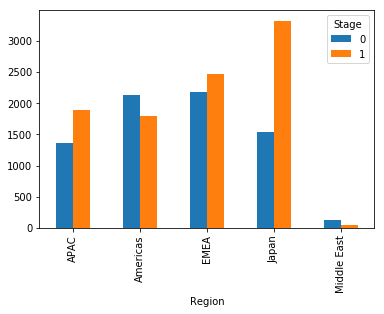

In [15]:
pd.crosstab(df.Region,df.Stage).plot(kind='bar')

In [16]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(["Stage"],axis=1), df.Stage, test_size=0.3, random_state=0)

In [17]:
numerical = [u'Pricing, Delivery_Terms_Quote_Appr', u'Pricing, Delivery_Terms_Approved', 
             u'Bureaucratic_Code_0_Approval', u'Bureaucratic_Code_0_Approved', u'Submitted_for_Approval', 
             u'Opportunity_ID', u'ASP', u'ASP_(converted)', u'Delivery_Year', u'TRF', u'Total_Amount', 
             u'Total_Taxable_Amount', u'Planned_Delivery_End_Date', u'Planned_Delivery_Start_Date', 
             u'Account_Created_Date', u'Opportunity_Created_Date', u'Quote_Expiry_Date', u'Last_Modified_Date']
categorical = [x for x in df.columns if x not in numerical and x != 'Stage']

In [18]:
for c in categorical:
    df[c] = df[c].astype('category')

In [19]:
useless = ["Submitted_for_Approval", "Opportunity_Name", "Account_Type", "Delivery_Terms", "Size", "Price", "ASP_Currency", "Total_Amount_Currency", "Total_Taxable_Amount_Currency"]
dates = ["Account_Created_Date", "Opportunity_Created_Date", "Quote_Expiry_Date", "Last_Modified_Date", "Planned_Delivery_Start_Date", "Planned_Delivery_End_Date"]
target = ["Stage"]

In [32]:
#agreg = df.groupby("Opportunity_ID")["Opportunity_ID"].count().reset_index(name = "Contacts")
df["Contacts"] = df.groupby("Opportunity_ID", sort=False)["Opportunity_ID"].transform('count')
df.head()

,Region,Territory,PricingDelivery_Terms_Quote_Appr,PricingDelivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,...,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_converted,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Contacts
0,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,...,None,None,None,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,0,1
1,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,...,None,None,None,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,0,EUR,48230.0,EUR,48230.0,1,1
2,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,...,None,None,None,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,0,USD,83865.6,USD,83865.6,1,1
3,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,...,Product_Category_B_16,0.42,USD,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,14,USD,7421881.5,USD,7421881.5,0,1
4,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,...,Product_Category_B_16,0.42,USD,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,25,USD,13357192.5,USD,13357192.5,0,1


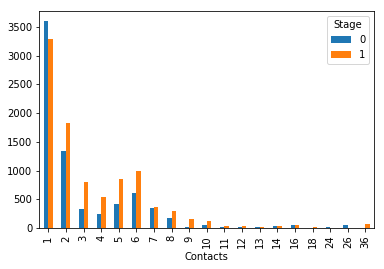

In [30]:
pd.crosstab(df.Contacts,df.Stage).plot(kind='bar')

In [82]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(target + dates, axis = 1), df.Stage, test_size = 0.3, random_state = 0)

In [83]:
train_data = lgb.Dataset(x_train.drop(["Opportunity_ID"], axis = 1), label = y_train, categorical_feature = categorical)
test_data = lgb.Dataset(x_test.drop(["Opportunity_ID"], axis = 1), label = y_test)


parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lgb.train(parameters, train_data, valid_sets=test_data, num_boost_round=5000, early_stopping_rounds=100)

[1]	valid_0's binary_logloss: 0.662415
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.622246
[3]	valid_0's binary_logloss: 0.586323
[4]	valid_0's binary_logloss: 0.553421
[5]	valid_0's binary_logloss: 0.539617
[6]	valid_0's binary_logloss: 0.510748
[7]	valid_0's binary_logloss: 0.484171
[8]	valid_0's binary_logloss: 0.459821
[9]	valid_0's binary_logloss: 0.438188
[10]	valid_0's binary_logloss: 0.428354
[11]	valid_0's binary_logloss: 0.408343
[12]	valid_0's binary_logloss: 0.390012
[13]	valid_0's binary_logloss: 0.37271
[14]	valid_0's binary_logloss: 0.356644
[15]	valid_0's binary_logloss: 0.34162
[16]	valid_0's binary_logloss: 0.334226
[17]	valid_0's binary_logloss: 0.32091
[18]	valid_0's binary_logloss: 0.308165
[19]	valid_0's binary_logloss: 0.296622
[20]	valid_0's binary_logloss: 0.285821
[21]	valid_0's binary_logloss: 0.275592
[22]	valid_0's binary_logloss: 0.265581
[23]	valid_0's binary_logloss: 0.260812
[24]	valid_0's binary_logloss:

[224]	valid_0's binary_logloss: 0.0768174
[225]	valid_0's binary_logloss: 0.0768734
[226]	valid_0's binary_logloss: 0.0768215
[227]	valid_0's binary_logloss: 0.0767923
[228]	valid_0's binary_logloss: 0.0766929
[229]	valid_0's binary_logloss: 0.076632
[230]	valid_0's binary_logloss: 0.076679
[231]	valid_0's binary_logloss: 0.0766564
[232]	valid_0's binary_logloss: 0.0766013
[233]	valid_0's binary_logloss: 0.0765169
[234]	valid_0's binary_logloss: 0.0765311
[235]	valid_0's binary_logloss: 0.0765546
[236]	valid_0's binary_logloss: 0.0765129
[237]	valid_0's binary_logloss: 0.0765631
[238]	valid_0's binary_logloss: 0.0765189
[239]	valid_0's binary_logloss: 0.0765937
[240]	valid_0's binary_logloss: 0.0765739
[241]	valid_0's binary_logloss: 0.0767629
[242]	valid_0's binary_logloss: 0.0767226
[243]	valid_0's binary_logloss: 0.0765514
[244]	valid_0's binary_logloss: 0.0766103
[245]	valid_0's binary_logloss: 0.0766639
[246]	valid_0's binary_logloss: 0.0767015
[247]	valid_0's binary_logloss: 0.07

In [84]:
ev = pd.DataFrame([model.feature_importance(), model.feature_importance("gain")] , columns = model.feature_name())
#list(zip(model.feature_importance(), model.feature_importance("gain")))
ev

,Region,Territory,PricingDelivery_Terms_Quote_Appr,PricingDelivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Source,Billing_Country,Account_Name,Opportunity_Name,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_converted,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Contacts
0,2.00000,66.000000,200.000000,265.000000,255.00000,209.000000,0.0,23.000000,4.000000,16.000000,164.000000,0.0,146.000000,107.000000,153.000000,0.0,3.000000,3.000000,3.00000,5.000000,1.0000,1.00000,1.0000,0.0,143.000000,135.000000,146.000000,182.000000,3.00000,1524.000000,226.000000,322.000000,633.000000,436.000000,385.000000,1.0000,1506.000000,0.0,1774.000000,633.000000
1,26.66543,296.756505,360.984544,737.877948,523.42472,458.245676,0.0,978.613107,48.918979,158.219325,5588.093934,0.0,60740.352975,830.230125,1237.715831,0.0,4.632685,2.852621,10.10362,82.090821,3.4218,6.31472,29.8638,0.0,1058.826612,1744.460401,687.319878,2003.669962,18.51691,3585.731568,2215.163784,1875.989207,1351.005264,1053.888277,1600.218864,22.8857,4368.434623,0.0,4483.631955,1442.952763


In [85]:
useless = ["Submitted_for_Approval", "Opportunity_Name", "Account_Type", "Quote_Type", "Delivery_Terms", "Product_Type", "Size", "Price", "ASP_Currency", "Total_Taxable_Amount_Currency"]
useless

['Submitted_for_Approval',
 'Opportunity_Name',
 'Account_Type',
 'Quote_Type',
 'Delivery_Terms',
 'Product_Type',
 'Size',
 'Price',
 'ASP_Currency',
 'Total_Taxable_Amount_Currency']

In [88]:
y_pred = model.predict(x_test.drop(["Opportunity_ID"], axis = 1))

In [89]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

0.07488523793012347

In [90]:
train_data = lgb.Dataset(x_train.drop(useless + ["Opportunity_ID"], axis = 1), label = y_train, 
                         categorical_feature = [c for c in categorical if c not in useless])
test_data = lgb.Dataset(x_test.drop(useless + ["Opportunity_ID"], axis = 1), label = y_test)


parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model_clean = lgb.train(parameters, train_data, valid_sets = test_data, num_boost_round=5000, early_stopping_rounds=100)

[1]	valid_0's binary_logloss: 0.644043
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.623952
[3]	valid_0's binary_logloss: 0.587766
[4]	valid_0's binary_logloss: 0.570656
[5]	valid_0's binary_logloss: 0.539811
[6]	valid_0's binary_logloss: 0.527548
[7]	valid_0's binary_logloss: 0.500244
[8]	valid_0's binary_logloss: 0.474636
[9]	valid_0's binary_logloss: 0.451094
[10]	valid_0's binary_logloss: 0.440364
[11]	valid_0's binary_logloss: 0.431427
[12]	valid_0's binary_logloss: 0.423204
[13]	valid_0's binary_logloss: 0.403595
[14]	valid_0's binary_logloss: 0.394837
[15]	valid_0's binary_logloss: 0.377081
[16]	valid_0's binary_logloss: 0.360848
[17]	valid_0's binary_logloss: 0.353136
[18]	valid_0's binary_logloss: 0.348122
[19]	valid_0's binary_logloss: 0.333433
[20]	valid_0's binary_logloss: 0.327993
[21]	valid_0's binary_logloss: 0.314898
[22]	valid_0's binary_logloss: 0.309814
[23]	valid_0's binary_logloss: 0.305613
[24]	valid_0's binary_loglo

[205]	valid_0's binary_logloss: 0.0798231
[206]	valid_0's binary_logloss: 0.0797301
[207]	valid_0's binary_logloss: 0.0796765
[208]	valid_0's binary_logloss: 0.0796236
[209]	valid_0's binary_logloss: 0.0794645
[210]	valid_0's binary_logloss: 0.079488
[211]	valid_0's binary_logloss: 0.0792583
[212]	valid_0's binary_logloss: 0.0792389
[213]	valid_0's binary_logloss: 0.0791626
[214]	valid_0's binary_logloss: 0.0791231
[215]	valid_0's binary_logloss: 0.0790522
[216]	valid_0's binary_logloss: 0.0789368
[217]	valid_0's binary_logloss: 0.0788826
[218]	valid_0's binary_logloss: 0.0789773
[219]	valid_0's binary_logloss: 0.0789752
[220]	valid_0's binary_logloss: 0.0788611
[221]	valid_0's binary_logloss: 0.0785621
[222]	valid_0's binary_logloss: 0.0784146
[223]	valid_0's binary_logloss: 0.0781823
[224]	valid_0's binary_logloss: 0.0780197
[225]	valid_0's binary_logloss: 0.0778602
[226]	valid_0's binary_logloss: 0.0777438
[227]	valid_0's binary_logloss: 0.0776548
[228]	valid_0's binary_logloss: 0.0

[426]	valid_0's binary_logloss: 0.0755866
[427]	valid_0's binary_logloss: 0.075456
[428]	valid_0's binary_logloss: 0.0755151
[429]	valid_0's binary_logloss: 0.0755364
[430]	valid_0's binary_logloss: 0.0755484
[431]	valid_0's binary_logloss: 0.0756446
[432]	valid_0's binary_logloss: 0.075662
[433]	valid_0's binary_logloss: 0.0757001
[434]	valid_0's binary_logloss: 0.0758972
[435]	valid_0's binary_logloss: 0.075888
[436]	valid_0's binary_logloss: 0.0759376
[437]	valid_0's binary_logloss: 0.0759383
[438]	valid_0's binary_logloss: 0.075866
[439]	valid_0's binary_logloss: 0.0760149
[440]	valid_0's binary_logloss: 0.0760729
[441]	valid_0's binary_logloss: 0.0761184
[442]	valid_0's binary_logloss: 0.0760291
[443]	valid_0's binary_logloss: 0.0760593
[444]	valid_0's binary_logloss: 0.0760959
Early stopping, best iteration is:
[344]	valid_0's binary_logloss: 0.0742867


In [91]:
y_clean_pred = model_clean.predict(x_test.drop(useless + ["Opportunity_ID"], axis = 1))

In [92]:
log_loss(y_test, y_clean_pred)

0.07429756173234932

In [93]:
x_test

,Region,Territory,PricingDelivery_Terms_Quote_Appr,PricingDelivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_converted,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Contacts
2040,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,None,Japan,Account_Name_1888,Opportunity_Name_6785,1185,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,None,None,None,None,None,None,Person_Name_47,Product_Family_226,Product_Name_491,JPY,NaN,NaN,2016 - 3,Q1,2016,0,JPY,6200.00,JPY,496200.00,6
4069,APAC,Indonesia,1,0,1,0,0,Bureaucratic_Code_5,Source_9,Indonesia,Account_Name_65,Opportunity_Name_5811,2323,None,Person_Name_63,Person_Name_63,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_6,None,None,None,None,None,None,Person_Name_63,Product_Family_90,Product_Name_114,USD,0.3900,0.39000,2016 - 9,Q3,2016,0,USD,12918.75,USD,0.00,1
4230,APAC,Singapore,1,0,0,0,0,Bureaucratic_Code_5,None,Singapore,Account_Name_430,Opportunity_Name_8984,2444,671,Person_Name_21,Person_Name_19,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_6,None,None,None,None,None,None,Person_Name_19,Product_Family_116,Product_Name_167,USD,0.4900,0.49000,2016 - 9,Q3,2016,0,USD,42943.60,USD,42943.60,1
578,Americas,None,1,1,0,0,0,Bureaucratic_Code_4,Source_7,United States,Account_Name_1448,Opportunity_Name_8157,245,1183,Person_Name_64,Person_Name_33,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_8,None,None,None,None,None,None,Person_Name_33,Product_Family_116,Product_Name_167,USD,0.4500,0.45000,2016 - 12,Q4,2016,0,USD,18900.00,USD,18900.00,1
12595,APAC,Australia,0,0,0,0,0,Bureaucratic_Code_4,None,Australia,Account_Name_660,Opportunity_Name_4774,7613,4024,Person_Name_43,Person_Name_43,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_1,None,None,None,None,None,None,Person_Name_43,Product_Family_133,Product_Name_226,AUD,0.5350,0.37857,2018 - 6,Q2,2018,0,AUD,108605.00,AUD,1095412.50,10
6042,Japan,None,1,1,1,1,0,Bureaucratic_Code_4,Source_3,Japan,Account_Name_1075,Opportunity_Name_6506,3730,1787,Person_Name_66,Person_Name_66,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_5,None,None,None,None,None,None,Person_Name_47,Product_Family_115,Product_Name_192,USD,0.3950,0.39500,2017 - 4,Q2,2017,0,USD,31852.80,USD,31852.80,1
2763,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,Source_9,Germany,Account_Name_533,Opportunity_Name_9128,1532,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_2,None,None,None,None,None,None,Person_Name_47,Product_Family_73,Product_Name_82,EUR,0.4900,0.55424,2016 - 6,Q2,2016,1,EUR,318622.50,EUR,318622.50,1
15932,APAC,Australia,1,1,1,1,0,Bureaucratic_Code_4,None,Australia,Account_Name_660,Opportunity_Name_4788,10428,None,Person_Name_43,Person_Name_43,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_1,Other,Other,Other,Other,Other,USD,Person_Name_43,Product_Family_167,Product_Name_315,USD,0.3600,0.36000,2019 - 3,Q1,2019,0,USD,82555.20,USD,346982.40,4
2669,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,None,Japan,Account_Name_1888,Opportunity_Name_5897,1485,311,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,None,None,None,None,None,None,Person_Name_47,Product_Family_23,Product_Name_23,JPY,NaN,NaN,2016 - 5,Q2,2016,0,JPY,140000.00,JPY,1152800.00,8
12803,Japan,None,1,1,0,0,0,Bureaucratic_Code_1,None,Japan,Account_Name_1888,Opportunity_Name_5704,7761,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,Oth

In [94]:
index_test = y_test.index

In [95]:
pred = pd.DataFrame(y_clean_pred, index = index_test, columns = ['Prediction'])

In [102]:
eval_info = x_test.join(pred)
eval_info = eval_info.join(y_test)

In [113]:
eval_info["Min_pred"] = eval_info.groupby("Opportunity_ID", sort = False)["Prediction"].transform('min')
eval_info["Max_pred"] = eval_info.groupby("Opportunity_ID", sort = False)["Prediction"].transform('max')
eval_info["Mean_pred"] = eval_info.groupby("Opportunity_ID", sort = False)["Prediction"].transform('mean')

In [127]:
eval_info["Final_prediction"] = eval_info.apply(lambda row : row["Max_pred"] if row["Prediction"] > 0.5 else row["Min_pred"], axis = 1)

In [128]:
eval_info.loc[eval_info['Prediction'] < 0.5, 'Stage_pred'] = 0
eval_info.loc[eval_info['Prediction'] >= 0.5, 'Stage_pred'] = 1

In [129]:
wrong = eval_info[eval_info['Stage'] != eval_info['Stage_pred']]
print len(wrong), len(eval_info)

113 5065


In [135]:
check = eval_info.groupby("Opportunity_ID", sort = False)["Stage","Mean_pred", "Final_prediction"].mean()

In [136]:
log_loss(check["Stage"], check["Mean_pred"])

0.08483289551425564

In [165]:
eval_info[(0.3 <= eval_info["Mean_pred"]) & (eval_info["Mean_pred"] <= 0.7)]
len(eval_info)

5065

In [141]:
validation = pd.read_csv("Validacion_ECI_2020.csv")
validation = validation.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [142]:
validation.head()

,ID,Region,Territory,PricingDelivery_Terms_Quote_Appr,PricingDelivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,...,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_converted_Currency,ASP_converted,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A
0,6140,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,...,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_171,Product_Name_332,EUR,0.325,USD,0.36761,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,162240.0,EUR,367419.0,Prod_Category_A_None
1,6146,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,...,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,78624.0,EUR,367419.0,Prod_Category_A_None
2,6151,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,...,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_140,Product_Name_241,EUR,0.275,USD,0.31105,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,126555.0,EUR,367419.0,Prod_Category_A_None
3,6118,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6117,10690,6504,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,...,None,NaT,4/30/2019,4/25/2019,Person_Name_13,Product_Family_171,Product_Name_328,EUR,0.325,USD,0.36761,6/1/2019,6/28/2019,2019 - 6,Q2,2019,NaT,1,EUR,243360.0,EUR,757783.5,Prod_Category_A_None
4,6124,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6117,10690,6504,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,...,None,NaT,4/30/2019,4/25/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,6/1/2019,6/29/2019,2019 - 6,Q2,2019,NaT,0,EUR,157248.0,EUR,757783.5,Prod_Category_A_None


In [148]:
for c in categorical:
    validation[c] = validation[c].astype('category')

In [153]:
validation["Contacts"] = validation.groupby("Opportunity_ID", sort=False)["Opportunity_ID"].transform('count')

In [154]:
pred = model_clean.predict(validation.drop(useless + dates + ["ID","Last_Activity", "ASP_converted_Currency", "Prod_Category_A","Actual_Delivery_Date"] + ["Opportunity_ID"], axis = 1))

In [161]:
validation_index = validation.index
pred = pd.DataFrame(pred, index = validation_index, columns = ["Prediction"])
validation = validation.join(pred)
validation["Final_pred"] = validation.groupby("Opportunity_ID", sort = False)["Prediction"].transform('mean')

In [170]:
validation[(0.3 <= validation["Final_pred"]) & (validation["Final_pred"] <= 0.7)]

,ID,Region,Territory,PricingDelivery_Terms_Quote_Appr,PricingDelivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,...,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_converted_Currency,ASP_converted,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,Contacts,Prediction,Final_pred
74,11373,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,2/12/2019,None,Japan,Account_Name_1377,Opportunity_Name_9769,10730,None,Person_Name_55,Person_Name_55,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,4/15/2019,...,4/16/2019,Person_Name_28,Product_Family_132,Product_Name_231,JPY,0.000,USD,0.00000,4/20/2019,4/20/2019,2019 - 4,Q2,2019,NaT,0,JPY,11020.00,JPY,11020.00,Prod_Category_A_None,1,0.362414,0.362414
351,22167,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_11,United States,Account_Name_25,Opportunity_Name_8394,10893,5728,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,1/24/2019,...,1/26/2019,Person_Name_8,Product_Family_213,Product_Name_447,USD,0.375,USD,0.37500,1/28/2019,1/28/2019,2019 - 1,Q1,2019,NaT,0,USD,51975.00,USD,51975.00,Prod_Category_A_None,1,0.514926,0.514926
752,10013,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,1/3/2019,None,France,Account_Name_788,Opportunity_Name_12749,11239,5975,Person_Name_16,Person_Name_16,Account_Type_1,Opportunity_Type_1,Non Binding,Delivery_Terms_2,1/3/2019,...,2/25/2019,Person_Name_16,Product_Family_140,Product_Name_241,EUR,0.265,USD,0.29974,4/22/2019,4/22/2019,2019 - 4,Q2,2019,NaT,0,EUR,54878.85,EUR,54878.85,Prod_Category_A_None,1,0.555193,0.555193
922,10305,EMEA,Germany,1,0,1,0,0,Bureaucratic_Code_5,9/12/2016,Source_7,Germany,Account_Name_1436,Opportunity_Name_4449,11353,None,Person_Name_62,Person_Name_62,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_2,1/14/2019,...,3/12/2019,Person_Name_13,Product_Family_168,Product_Name_322,EUR,0.320,USD,0.36195,1/21/2019,1/30/2019,2019 - 1,Q1,2019,NaT,0,EUR,27033.60,EUR,104139.23,Prod_Category_A_None,2,0.452806,0.595206
923,10311,EMEA,Germany,1,0,1,0,0,Bureaucratic_Code_5,9/12/2016,Source_7,Germany,Account_Name_1436,Opportunity_Name_4449,11353,None,Person_Name_62,Person_Name_62,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_2,1/14/2019,...,3/12/2019,Person_Name_13,Product_Family_140,Product_Name_241,EUR,0.255,USD,0.28843,1/21/2019,1/31/2019,2019 - 1,Q1,2019,NaT,0,EUR,77105.63,EUR,104139.23,Prod_Category_A_None,2,0.737605,0.595206
998,8295,APAC,Australia,1,0,1,0,0,Bureaucratic_Code_5,2/20/2017,Source_7,Australia,Account_Name_266,Opportunity_Name_2913,11407,None,Person_Name_43,Person_Name_43,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_1,2/11/2019,...,4/3/2019,Person_Name_7,Product_Family_140,Product_Name_241,USD,0.305,USD,0.30500,2/11/2019,3/31/2019,2019 - 2,Q1,2019,NaT,0,USD,65501.80,USD,670986.40,Prod_Category_A_None,9,0.396871,0.327712
999,8306,APAC,Australia,1,0,1,0,0,Bureaucratic_Code_5,2/20/2017,Source_7,Australia,Account_Name_266,Opportunity_Name_2913,11407,None,Person_Name_43,Person_Name_43,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_1,2/11/2019,...,4/3/2019,Person_Name_7,Product_Family_140,Product_Name_241,USD,0.305,USD,0.30500,2/11/2019,3/31/2019,2019 - 2,Q1,2019,NaT,0,USD,65501.80,USD,670986.40,Prod_Category_A_None,9,0.396871,0.327712
1000,8323,APAC,Australia,1,0,1,0,0,Bureaucratic_Code_5,2/20/2017,Source_7,Australia,Account_Name_266,Opportunity_Name_2913,11407,None,Person_Name_43,Person_Name_43,Account_Type_0,Opportunity_Type_8,Non Binding,D

In [169]:
len(validation)

2551

In [171]:
answer = validation.groupby("Opportunity_ID")["Final_pred"].mean()

In [173]:
answer

Opportunity_ID
10689    0.996997
10690    0.994578
10691    0.930921
10692    0.879008
10693    0.992272
10694    0.992272
10695    0.005056
10696    0.000880
10697    0.009166
10698    0.009150
10699    0.027019
10700    0.001109
10701    0.025719
10702    0.003696
10703    0.001109
10704    0.991225
10705    0.992156
10706    0.049354
10707    0.005275
10708    0.003019
10709    0.994676
10710    0.014303
10711    0.125118
10712    0.996358
10713    0.014288
10714    0.010337
10715    0.084643
10716    0.999408
10717    0.008283
10718    0.932668
           ...   
12339    0.692491
12340    0.448573
12341    0.038909
12342    0.031693
12343    0.990251
12344    0.999323
12345    0.000604
12346    0.000518
12347    0.000435
12348    0.000523
12349    0.000235
12350    0.000422
12351    0.000674
12352    0.993941
12353    0.963285
12354    0.012222
12355    0.994470
12356    0.002471
12357    0.002701
12358    0.007347
12359    0.033956
12360    0.154515
12361    0.015195
12362    0.98

In [175]:
answer.to_csv("submission1.csv", header = False)

In [179]:
#answer[(0.3 <= answer["Final_pred"]) & (answer["Final_pred"] <= 0.7)]
answer.describe()

count    1567.000000
mean        0.503553
std         0.474876
min         0.000016
25%         0.003434
50%         0.631163
75%         0.990052
max         0.999932
Name: Final_pred, dtype: float64

In [180]:
validation.groupby("Opportunity_ID")["Prediction"].mean()

Opportunity_ID
10689    0.996997
10690    0.994578
10691    0.930921
10692    0.879008
10693    0.992272
10694    0.992272
10695    0.005056
10696    0.000880
10697    0.009166
10698    0.009150
10699    0.027019
10700    0.001109
10701    0.025719
10702    0.003696
10703    0.001109
10704    0.991225
10705    0.992156
10706    0.049354
10707    0.005275
10708    0.003019
10709    0.994676
10710    0.014303
10711    0.125118
10712    0.996358
10713    0.014288
10714    0.010337
10715    0.084643
10716    0.999408
10717    0.008283
10718    0.932668
           ...   
12339    0.692491
12340    0.448573
12341    0.038909
12342    0.031693
12343    0.990251
12344    0.999323
12345    0.000604
12346    0.000518
12347    0.000435
12348    0.000523
12349    0.000235
12350    0.000422
12351    0.000674
12352    0.993941
12353    0.963285
12354    0.012222
12355    0.994470
12356    0.002471
12357    0.002701
12358    0.007347
12359    0.033956
12360    0.154515
12361    0.015195
12362    0.98